Question 1 - Extracting Tesla Stock Data Using yfinance

In [3]:
# Import necessary libraries
import yfinance as yf

# Define the ticker symbol for Tesla
ticker_symbol = 'TSLA'

# Get data on this ticker
tesla_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
tesla_stock_data = tesla_data.history(period='max')

# Display the first few rows of the data
tesla_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Tesla's financials page on Macrotrends
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Define headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Send a GET request to the URL
response = requests.get(url, headers=headers)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the main content div
main_content = soup.find('div', {'id': 'main_content'})

# Find the table containing the revenue data within the main content
revenue_table = main_content.find('table', {'class': 'historical_data_table table'})

# Check if the table was found
if revenue_table is None:
    print("Revenue table not found.")
else:
    # Extract the data from the table
    rows = revenue_table.find_all('tr')
    data = []
    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])

    # Create a DataFrame
    tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

    # Display the first few rows of the data
    print(tesla_revenue.head())

   Date  Revenue
0  2023  $96,773
1  2022  $81,462
2  2021  $53,823
3  2020  $31,536
4  2019  $24,578


Question 3 - Extracting GameStop Stock Data Using yfinance

In [12]:
# Define the ticker symbol for GameStop
ticker_symbol = 'GME'

# Get data on this ticker
gamestop_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
gamestop_stock_data = gamestop_data.history(period='max')

# Display the first few rows of the data
gamestop_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Tesla's financials page on Macrotrends
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Send a GET request to the URL
response = requests.get(url, headers=headers)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the main content div
main_content = soup.find('div', {'id': 'main_content'})

# Find the table containing the revenue data within the main content
revenue_table = main_content.find('table', {'class': 'historical_data_table table'})

# Check if the table was found
if revenue_table is None:
    print("Revenue table not found.")
else:
    # Extract the data from the table
    rows = revenue_table.find_all('tr')
    data = []
    for row in rows[1:]:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])

    # Create a DataFrame
    gamestop_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

    # Display the first few rows of the data
    print(gamestop_revenue.head())



   Date Revenue
0  2024  $5,273
1  2023  $5,927
2  2022  $6,011
3  2021  $5,090
4  2020  $6,466


Question 5 - Tesla Stock and Revenue Dashboard

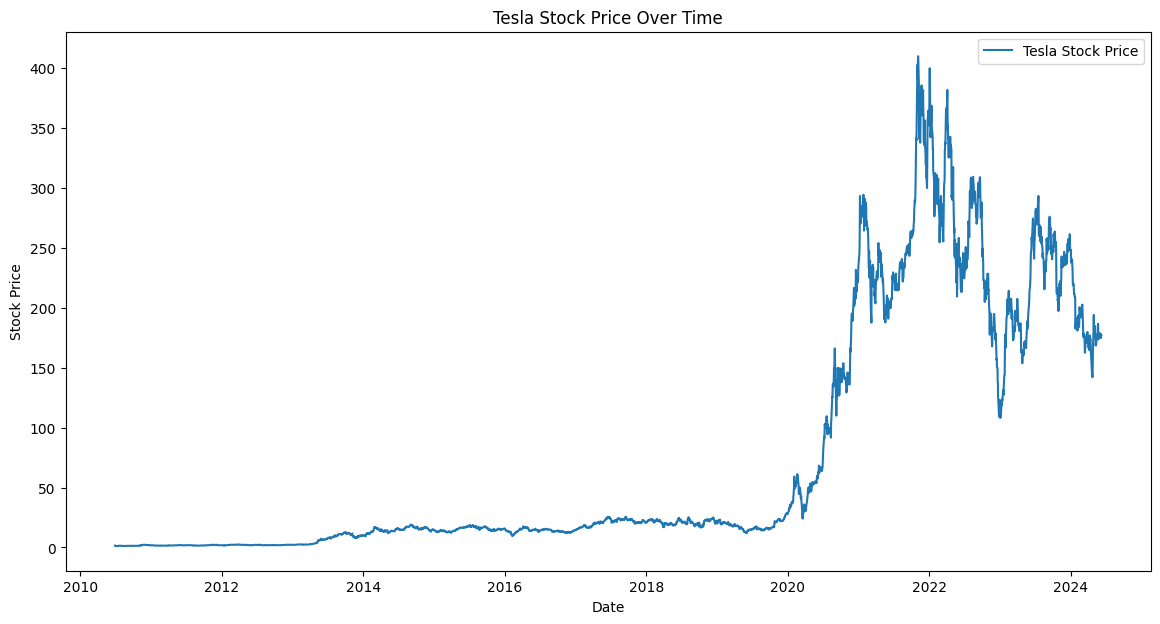

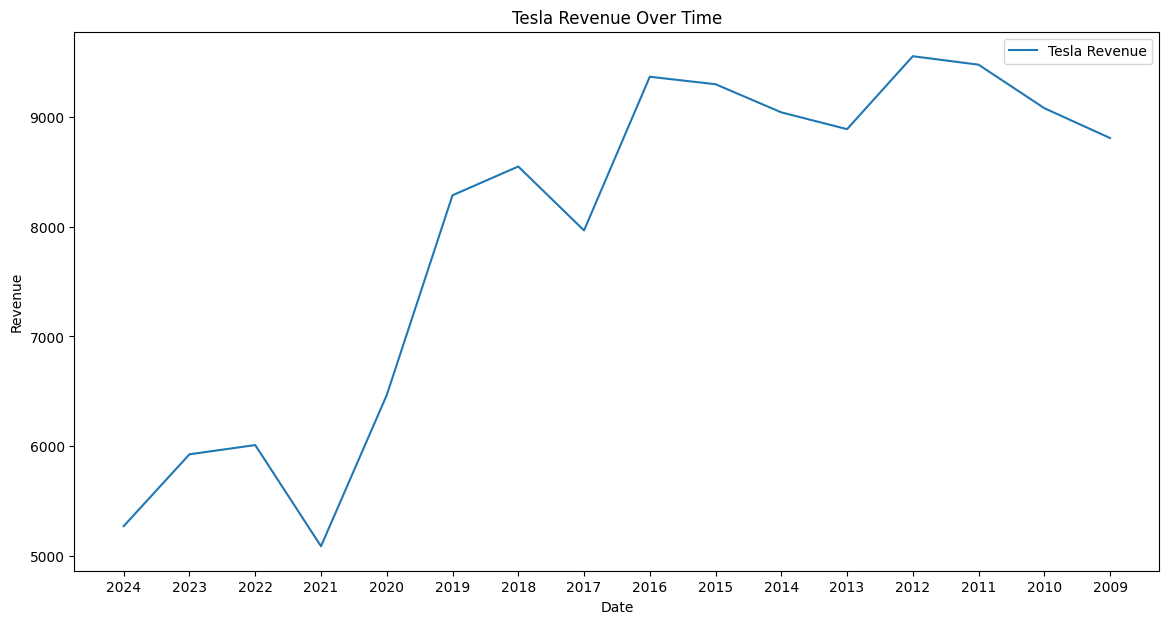

In [18]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Plot Tesla stock data
plt.figure(figsize=(14, 7))
plt.plot(tesla_stock_data.index, tesla_stock_data['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot Tesla revenue data
# Remove dollar signs and commas, then convert to float
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)
plt.figure(figsize=(14, 7))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label='Tesla Revenue')
plt.title('Tesla Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

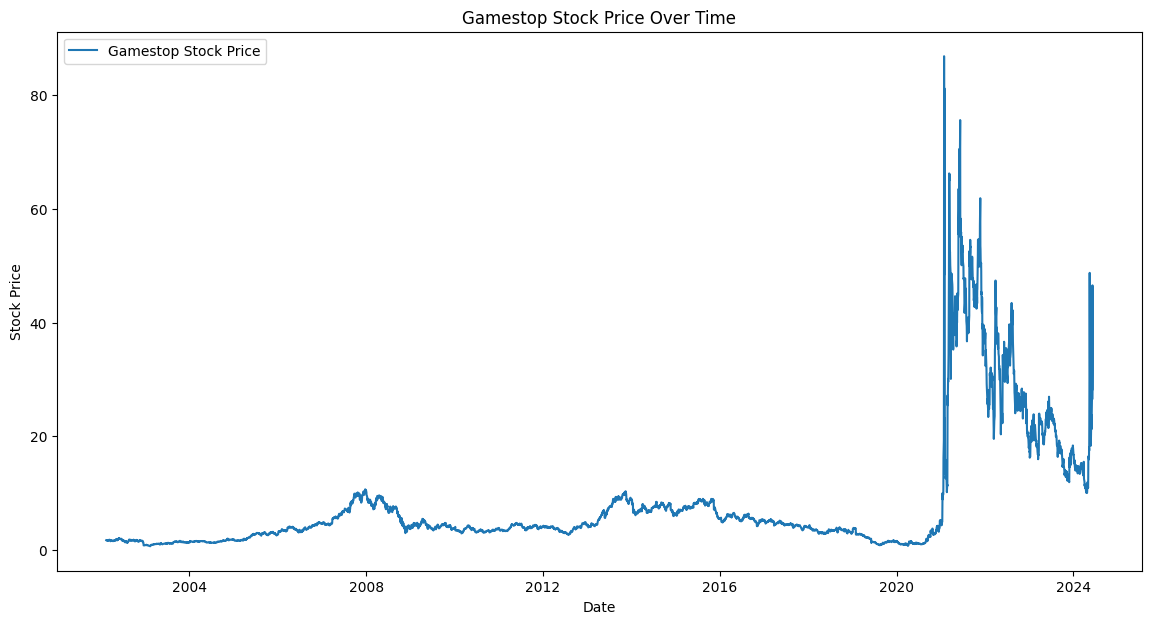

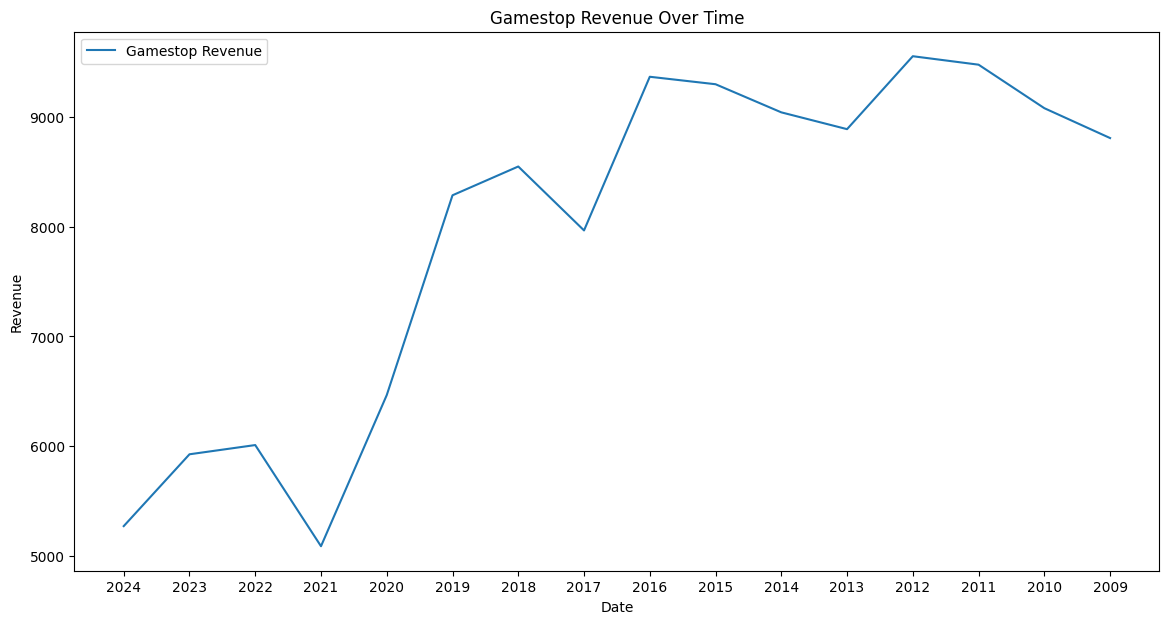

In [20]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Plot Tesla stock data
plt.figure(figsize=(14, 7))
plt.plot(gamestop_stock_data.index, gamestop_stock_data['Close'], label='Gamestop Stock Price')
plt.title('Gamestop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot Tesla revenue data
# Remove dollar signs and commas, then convert to float
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)
plt.figure(figsize=(14, 7))
plt.plot(gamestop_revenue['Date'], gamestop_revenue['Revenue'], label='Gamestop Revenue')
plt.title('Gamestop Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

Author: Nabelou Ouologeum